# Exploration of the Prosper loan data 
## by Folami Justin Balogun

## Introduction
> This dataset includes details of such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Below is a description of columns that will be used further down the exploration of this dataset:  
1. ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.  
2. Term: The length of the loan expressed in months.  
3. LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress,  PastDue. The PastDue status will be accompanied by a delinquency bucket.  
4. BorrowerAPR:	The Borrower's Annual Percentage Rate (APR) for the loan.  
5. BorrowerRate:	The Borrower's interest rate for this loan.  
6. ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.  
7. ListingCategory:	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans  
8. Occupation:	The Occupation selected by the Borrower at the time they created the listing.  
9. EmploymentStatus:	The employment status of the borrower at the time they posted the listing.  
10. EmploymentStatusDuration:	The length in months of the employment status at the time the listing was created.  
11. DateCreditPulled:	The date the credit profile was pulled.   
12.  DebtToIncomeRatio:	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).  
13. IncomeRange:	The income range of the borrower at the time the listing was created.  
14. IncomeVerifiable:	The borrower indicated they have the required documentation to support their income.  
15. StatedMonthlyIncome:	The monthly income the borrower stated at the time the listing was created.  
16. LoanOriginalAmount:	The origination amount of the loan.  
17. LoanOriginationDate:	The date the loan was originated.  
18. LoanOriginationQuarter:	The quarter in which the loan was originated.  
19. MonthlyLoanPayment:	The scheduled monthly loan payment.  
20. Recommendations:	Number of recommendations the borrower had at the time the listing was created.  


## Preliminary Wrangling


## Data gathering

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import re

%matplotlib inline

In [2]:
# get the dataset from the url
url="https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv"
response=requests.get(url)

open("prosperLoanData.csv", mode="wb").write(response.content)

86471101

In [2]:
# load dataset
loan_data= pd.read_csv("prosperLoanData.csv")
print(loan_data.shape)


(113937, 81)


## Assessing

In [31]:
# assess
loan_data.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
# assess
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Data cleaning

In [3]:
# make a copy of the data
loan_df = loan_data.copy()

After assessing and making a copy of the dataset, I will be improving the way the column names are written for easy use in the exploration. 

In [4]:
#alter column names
var=list(loan_df.columns)
var = [re.sub(r"(?<=[a-z])(?=[A-Z])", "_", x).lower() for x in var]
loan_df.columns = var
loan_df.head()

,listing_key,listing_number,listing_creation_date,credit_grade,term,loan_status,closed_date,borrower_apr,borrower_rate,lender_yield,...,lp_service_fees,lp_collection_fees,lp_gross_principal_loss,lp_net_principal_loss,lp_non_principal_recoverypayments,percent_funded,recommendations,investment_from_friends_count,investment_from_friends_amount,investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


The dataset contains 81 columns which will not all be explored for the purpose of this exploration. Therefore, I will be choosing only columns I am interested in exploring. I selected this using the Prosper_data_dictionary which can be found in the workspace.

In [5]:
# select columns to work with
loan_df = loan_df[["listing_number",
"term",
"loan_status",
"borrower_apr",
"borrower_rate",
"prosper_score",
"listing_category (numeric)",
"occupation",
"employment_status",
"employment_status_duration",
"date_credit_pulled",
"debt_to_income_ratio",
"income_range",
"income_verifiable",
"stated_monthly_income",
"loan_original_amount",
"loan_origination_date",
"loan_origination_quarter",
"monthly_loan_payment",
"recommendations"]]

In [6]:
# rename column
loan_df.rename(columns = {"listing_category (numeric)":'listing_category'}, inplace = True)

In [7]:
# edit column values in listing category. replace the numbers with what they represent

loan_df.listing_category=loan_df.listing_category.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],["Not Available", "Debt Consolidation", "Home Improvement", "Business", "Personal Loan", "Student Use", "Auto", "Other", "Baby&Adoption", "Boat", "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses", "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation", "Wedding Loans"
])

In [8]:
loan_df.head()

,listing_number,term,loan_status,borrower_apr,borrower_rate,prosper_score,listing_category,occupation,employment_status,employment_status_duration,date_credit_pulled,debt_to_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_original_amount,loan_origination_date,loan_origination_quarter,monthly_loan_payment,recommendations
0,193129,36,Completed,0.16516,0.1580,NaN,Not Available,Other,Self-employed,2.0,2007-08-26 18:41:46.780000000,0.17,"$25,000-49,999",True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43,0
1,1209647,36,Current,0.12016,0.0920,7.0,Home Improvement,Professional,Employed,44.0,2014-02-27 08:28:14,0.18,"$50,000-74,999",True,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93,0
2,81716,36,Completed,0.28269,0.2750,NaN,Not Available,Other,Not available,NaN,2007-01-02 14:09:10.060000000,0.06,Not displayed,True,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32,0
3,658116,36,Current,0.12528,0.0974,9.0,Motorcycle,Skilled Labor,Employed,113.0,2012-10-22 11:02:32,0.15,"$25,000-49,999",True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45,0
4,909464,36,Current,0.24614,0.2085,4.0,Home Improvement,Executive,Employed,44.0,2013-09-14 18:38:44,0.26,"$100,000+",True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97,0


In [9]:
loan_df.nunique()

listing_number                113066
term                               3
loan_status                       12
borrower_apr                    6677
borrower_rate                   2294
prosper_score                     11
listing_category                  21
occupation                        67
employment_status                  8
employment_status_duration       605
date_credit_pulled            112992
debt_to_income_ratio            1207
income_range                       8
income_verifiable                  2
stated_monthly_income          13502
loan_original_amount            2468
loan_origination_date           1873
loan_origination_quarter          33
monthly_loan_payment           23567
recommendations                   17
dtype: int64

In [10]:
loan_df.dtypes

listing_number                  int64
term                            int64
loan_status                    object
borrower_apr                  float64
borrower_rate                 float64
prosper_score                 float64
listing_category               object
occupation                     object
employment_status              object
employment_status_duration    float64
date_credit_pulled             object
debt_to_income_ratio          float64
income_range                   object
income_verifiable                bool
stated_monthly_income         float64
loan_original_amount            int64
loan_origination_date          object
loan_origination_quarter       object
monthly_loan_payment          float64
recommendations                 int64
dtype: object

In [11]:
loan_df.describe()

,listing_number,term,borrower_apr,borrower_rate,prosper_score,employment_status_duration,debt_to_income_ratio,stated_monthly_income,loan_original_amount,monthly_loan_payment,recommendations
count,1.139370e+05,113937.000000,113912.000000,113937.000000,84853.000000,106312.000000,105383.000000,1.139370e+05,113937.00000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,5.950067,96.071582,0.275947,5.608026e+03,8337.01385,272.475783,0.048027
std,3.280762e+05,10.436212,0.080364,0.074818,2.376501,94.480605,0.551759,7.478497e+03,6245.80058,192.697812,0.332353
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,4.000000,26.000000,0.140000,3.200333e+03,4000.00000,131.620000,0.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,6.000000,67.000000,0.220000,4.666667e+03,6500.00000,217.740000,0.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,8.000000,137.000000,0.320000,6.825000e+03,12000.00000,371.580000,0.000000
max,1.255725e+06,60.000000,0.512290,0.497500,11.000000,755.000000,10.010000,1.750003e+06,35000.00000,2251.510000,39.000000


### What is the structure of the dataset?

> The loan dataset contains 113937 rows and 81 columns. However, after going through the Prosper_data_dictionary while accessing, I have selected out the variables I believe I will be exploring down the line and dropped the others.

### Main feature(s) of interest in the dataset?

> I am interested in analyzing the variables that may determine loan completion and loan charge off.

### What features in the dataset I think will help support the investigation into your feature(s) of interest?

> I suspect that features such as occupation,borrower_apr, employment_status, income will affect loan payment. I would also like to see if prosper_score and recommendations are valuable metrics for determining who should get a loan.

## Univariate Exploration

I will be starting my exploration by looking at the loan_status variable



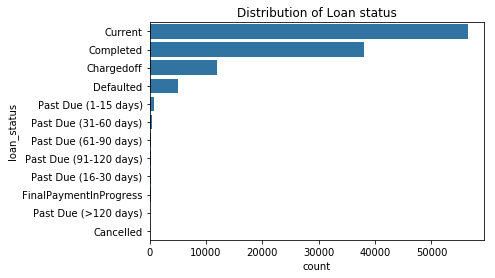

In [12]:
# explore loan_status

color=sb.color_palette()[0]

count = loan_df.loan_status.value_counts()
order = count.index
sb.countplot(data=loan_df, y="loan_status", color=color, order=order)
plt.title("Distribution of Loan status");

Those on track with their loan payment make up most of the people in the data(>50,000). Followed by those that have completed their loan payments. And then those for which their loans were charged off. I will be focusing on the people that have completed their loan payments and those that their loans were charged off.

Next up is the term variable. How long are loans given and which terms are most common? 

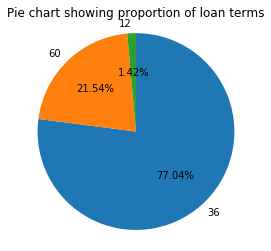

In [20]:
# pie chart of term
sorted_count = loan_df.term.value_counts()
plt.pie(sorted_count, labels=sorted_count.index,startangle=90,counterclock=False, autopct='%1.2f%%')
plt.axis("square")
plt.title("Pie chart showing proportion of loan terms (months)");

Over 77% of the loans spanned a duration of 36months while just about 1% took loans spanning 12months

Next, we will explore the loan_original_amount variable:

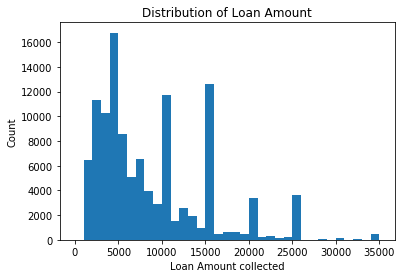

In [21]:
# histogram of loan_original_amount
bins=np.arange(0,loan_df.loan_original_amount.max()+1000,1000)
plt.hist(data=loan_df, x="loan_original_amount", bins=bins)
plt.xlabel("Loan Amount collected")
plt.title("Distribution of Loan Amount")
plt.ylabel("Count");

The histogram is unimodal, skewed to the right, with sharp spikes at certain values depicting amounts thats are usually very common to give out.

Next, I will be exploring the listing_category which is what the borrower indicated the money is for:

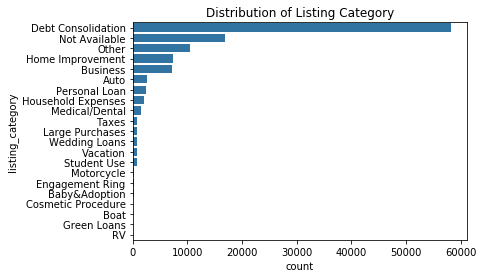

In [22]:
# explore listing category
count = loan_df.listing_category.value_counts()
order = count.index
sb.countplot(data=loan_df, y="listing_category", color=color, order=order)
plt.title("Distribution of Listing Category");

About half of the loans were taken to service debts. Home improvement, Business, Auto, Personal loans, household expenses and Medical/Dental are some of the other prominent categories.  

Next I would be exploring the stated_monthly_income and the monthly_loan_payment variable:

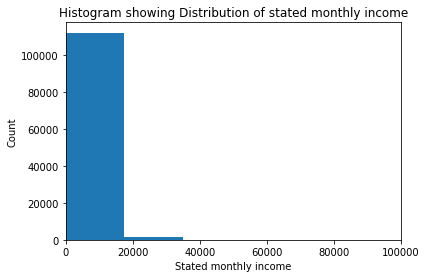

In [23]:
# histogram of the stated_monthly_income

plt.hist(data=loan_df, x="stated_monthly_income",bins=100)
plt.xlim([0,100000])
plt.xlabel("Stated monthly income")
plt.ylabel("Count")
plt.title("Histogram showing Distribution of stated monthly income");

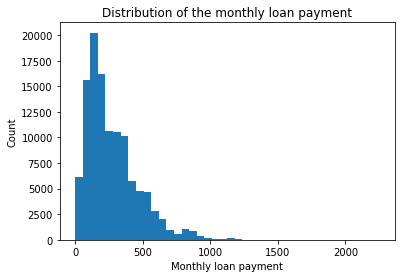

In [24]:
plt.hist(data=loan_df, x="monthly_loan_payment", bins=40)
plt.xlabel("Monthly loan payment")
plt.ylabel("Count")
plt.title("Distribution of the monthly loan payment");

I will be removing the outliers from the stated_monthly_income (>50000) and the monthly_loan_payment variable (>1500) though they are valid data points and also instances where there is either 0 monthly income or 0 monthly loan payment

In [25]:
# number of outliers 
outliers = (loan_df.stated_monthly_income > 50000) | (loan_df.monthly_loan_payment > 1500)
print(outliers.sum())


105


In [26]:
zero_income_and_loan_payment = (loan_df.stated_monthly_income == 0) | (loan_df.monthly_loan_payment ==0)
print(zero_income_and_loan_payment.sum())

2314


In [27]:
# remove the outliers
loan_df = loan_df.loc[-outliers & -zero_income_and_loan_payment,:]

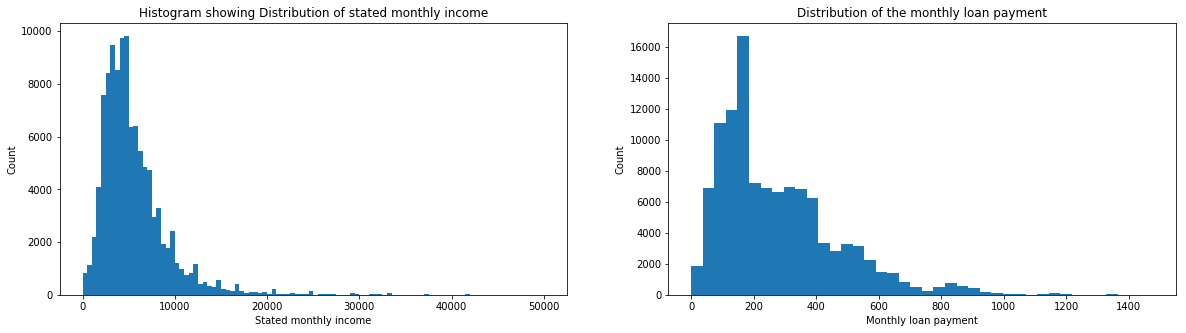

In [28]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.hist(data=loan_df, x="stated_monthly_income",bins=100)
plt.xlabel("Stated monthly income")
plt.ylabel("Count")
plt.title("Histogram showing Distribution of stated monthly income");

plt.subplot(1,2,2)
plt.hist(data=loan_df, x="monthly_loan_payment", bins=40)
plt.xlabel("Monthly loan payment")
plt.ylabel("Count")
plt.title("Distribution of the monthly loan payment");

After removing the extreme data points to aid better visualization, both charts are skewed to the right and unimodal

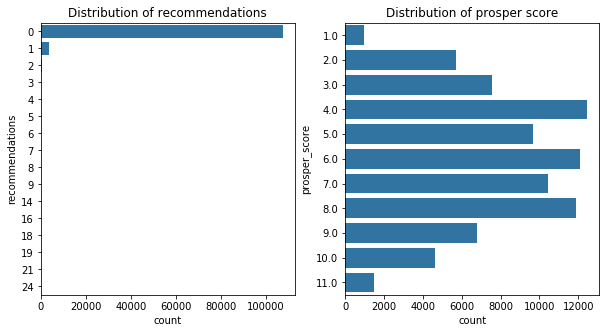

In [29]:

plt.figure(figsize=[10,5])
# recommendation chart
plt.subplot(1,2,1)
sb.countplot(data=loan_df, y="recommendations", color=color)
plt.title("Distribution of recommendations")
# prosper score chart
plt.subplot(1,2,2)
sb.countplot(data=loan_df, y="prosper_score", color=color)
plt.title("Distribution of prosper score");

Most people had no recommendation when the loan was listed. Also, prosper_score are supposed to range from 1-10 with 10 signifying the lowest risk but the dataset contains scores of 11. I would be removing these observations with a rating of 11

In [23]:
inconsistency = (loan_df.prosper_score == 11)

# remove the outliers
loan_df = loan_df.loc[-inconsistency,:]

Next I will be looking at the employment_status variable:

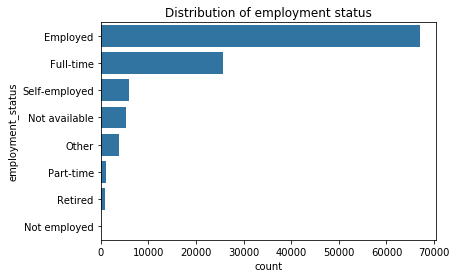

In [30]:
# create chart of employment status
count = loan_df.employment_status.value_counts()
order = count.index

sb.countplot(data=loan_df, y="employment_status", color=color, order=order)
plt.title("Distribution of employment status");

Chart shows most of the borrowers are employed. However, I will not be exploring this variable further as the grouping of the employment status was a bit confusing as employed people will also fall under part-time or full-time jobs.

Finally, I will look at how the borrower_apr is distributed in the dataset

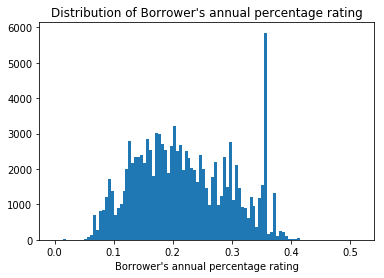

In [32]:
# drop observations with nulls
loan_df = loan_df.dropna(subset=["borrower_apr"])

bins=np.arange(0,loan_df.borrower_apr.max()+0.005,0.005)
plt.hist(data=loan_df, x="borrower_apr",bins=bins)
plt.xlabel("Borrower's annual percentage rating")
plt.title("Distribution of Borrower's annual percentage rating");

I firstly had to drop the nulls to be able to plot the histogram. The chart shows borrower_apr is slighly skewed to the right with the top of the curve around 0.2. However, there is a sharp spike at about 0.35, depicting a lot of people fall within this value.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan_status variable showed most of the borrowers were still currently paying back their loans and on schedule while the completed and charged off were the next most popular category. In total, I explored 10 variables in this aspect adjusting the dataset wherever I deemed apppropriate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no abnormally distributions with the stated monthly income and the monthly loan payment skewed to the right. I however removed extreme values from both variables which accounted for 105 observations. I also removed prosper_score with rating of 11 since prosper_score is supposed to range from 1-10. I also dropped rows with null borrower_apr values.

## Bivariate Exploration

In [34]:
num_vars = ["loan_original_amount","monthly_loan_payment","stated_monthly_income","borrower_apr","prosper_score"]
cat_vars = ["loan_status","term"]

### What is the correlation between the numerical variables?

Since the loan_status variable is my major variable of interest and I want to focus on the completed and chargedoff observations, I will be creating a dataframe with just this two observations which I will be working with down the line

In [35]:
# create dataframe where loan_status is completed or charged off
completed_chargedoff = loan_df.query("(loan_status == 'Completed') | (loan_status == 'Chargedoff')")

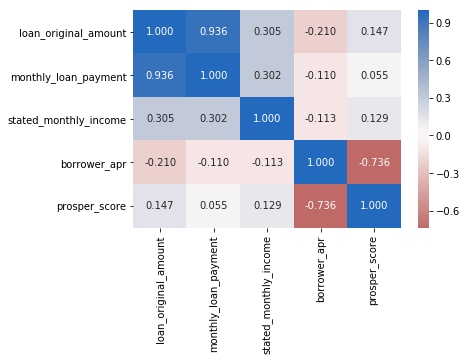

In [36]:
# create heatmap of the numeric variables

sb.heatmap(completed_chargedoff[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

completed_chargedoff.shape= (48178, 20)
completed_chargedoff_samp.shape= (500, 20)


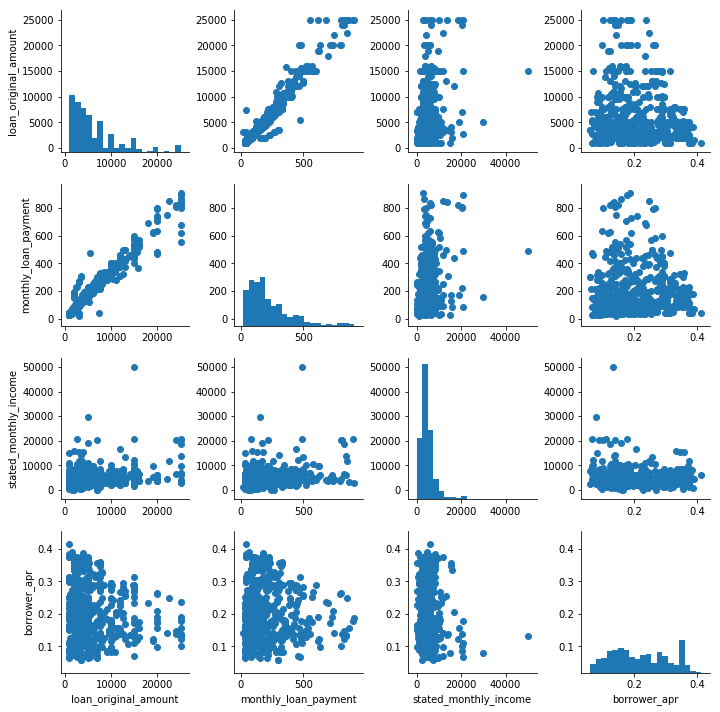

In [37]:
num_vars = ["loan_original_amount","monthly_loan_payment","stated_monthly_income","borrower_apr"]

# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("completed_chargedoff.shape=",completed_chargedoff.shape)
completed_chargedoff_samp = completed_chargedoff.sample(n=500, replace = False)
print("completed_chargedoff_samp.shape=",completed_chargedoff_samp.shape)

g = sb.PairGrid(data = completed_chargedoff_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

### What is the correlation between Prosper score and Borrower APR?

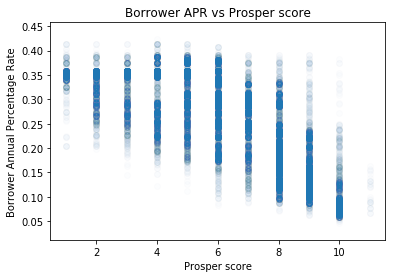

In [38]:
plt.scatter(data=completed_chargedoff, x="prosper_score", y="borrower_apr", alpha=0.01)
plt.xlabel("Prosper score")
plt.ylabel("Borrower Annual Percentage Rate")
plt.title("Borrower APR vs Prosper score");

A strong positive correlation is observed between the monthly loan payment and the loan original amount. On the other hand, a weak positive correlation coefficient is observed between the monthly loan payment and the stated monthly income. Also, a decent negative correlation is observed between the prosper score and the borrower apr. This is expected, as periodically, the credit score which is synonymous to the prosper score in this is used to determine borrower apr. Thus, the better the risk score(prosper score), the lower the borrower apr.



### What are the relationships between the categorical variables

> I will be comparing the categorical variables with loan status. First is the relationship between the loan status and term

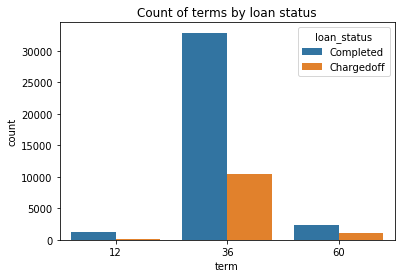

In [43]:

sb.countplot(data = completed_chargedoff, x = "term", hue = 'loan_status')
plt.title("Count of terms by loan status");


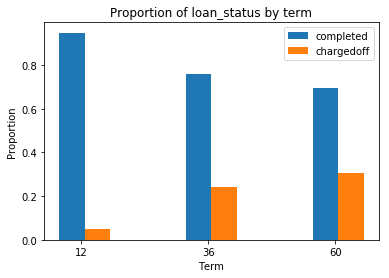

In [40]:
#count number of borrowers present in each term
total_term = completed_chargedoff.groupby(['term']).count()['listing_number']
#count number of borrowers likely to complete the loan or have the loan chargedoff for each term
counts_term = completed_chargedoff.groupby(['term','loan_status']).count()['listing_number']

#calculate proportions for each age group
df_12 = counts_term[12]/total_term[12]
df_36 = counts_term[36]/total_term[36]
df_60 = counts_term[60]/total_term[60]


def plot(Title, y, x):
    x_axis = np.arange(len(label))    # the x locations for the groups
    plt.bar(x_axis +0.20, completed, width=0.2, label = 'completed')
    plt.bar(x_axis +0.20*2, chargedoff, width=0.2, label = 'chargedoff')
    plt.title(Title)  #title label
    plt.ylabel(y)    #y label
    plt.xlabel(x)    #x label
    location = x_axis + 0.55 / 2  
    plt.xticks(location,label)
    plt.legend(loc = 1)
    
label = [12,36,60]

#y-values
chargedoff = [df_12[0], df_36[0], df_60[0]]
completed = [df_12[1], df_36[1], df_60[1]]


plot('Proportion of loan_status by term','Proportion','Term')

This shows that although the 36 month term had the highest chargedoff count, this was because the 36month term is the most common and in fact, loans that have a 60 month term are most likely to be charged off and the least likelihood to be completed.

### What is the correlation between the percentage of income used in servicing loans and the loan_status

> Next, I will be looking at how the % of income used in servicing a loan relates to whether the loan is completed or charged off

In [41]:
completed_chargedoff["income_percentage_used_on_loan"] = (completed_chargedoff.monthly_loan_payment / completed_chargedoff.stated_monthly_income) * 100

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


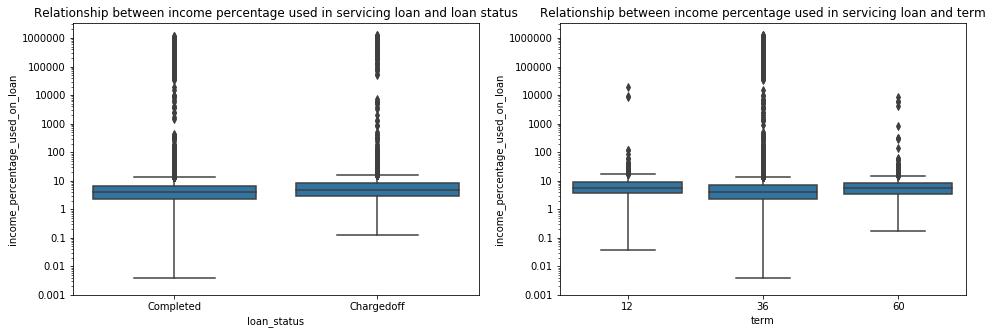

In [42]:
ticks = [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]
labels=["{}".format(v) for v in ticks]

plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sb.boxplot(data=completed_chargedoff,x="loan_status",y="income_percentage_used_on_loan",color=color)
plt.yscale("log")
plt.yticks(ticks,labels)
plt.title("Relationship between income percentage used in servicing loan and loan status")
          
plt.subplot(1,2,2)
sb.boxplot(data=completed_chargedoff,x="term",y="income_percentage_used_on_loan",color=color)
plt.yscale("log")
plt.yticks(ticks,labels)
plt.title("Relationship between income percentage used in servicing loan and term");

The chargedoff plot has a slightly higher median when compared to the completed. Its lower whisker is also much higher than that of the completed boxplot signifying that most borrowers who end up having their loans chargedoff usually had a higher percentage of their income servicing the loan. It also shows that it is unlikely that a loan will be charged off if less than 0.1% of the monthly income is being used to service the debt.

Next, What is the relationship between the numerical variables vs loan status and term?

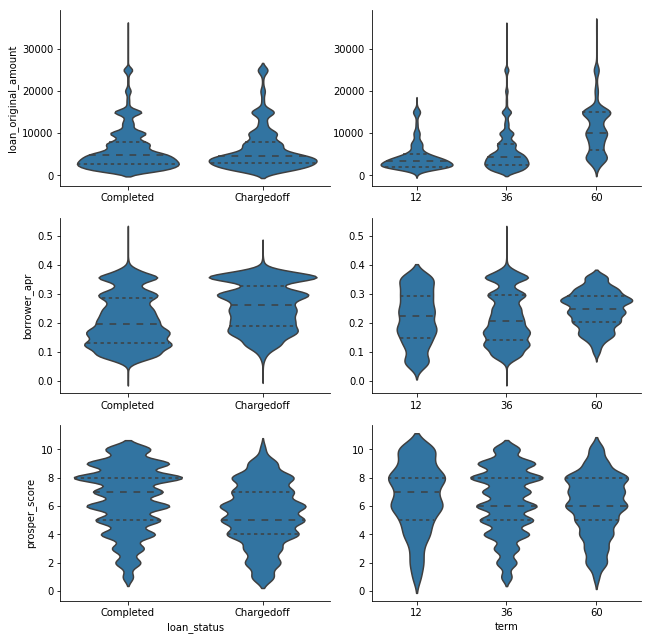

In [36]:
# plot matrix: categorical variables against other numeric variables
def violingrid(x, y, **kwargs):
    sb.violinplot(x=x, y=y, color=color, inner="quartile")

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = completed_chargedoff, y_vars = ["loan_original_amount","borrower_apr","prosper_score"], x_vars = ["loan_status","term"],
                size = 3, aspect = 1.5)
g.map(violingrid);

Little to no correlattion is observed between the loan original amount and the loan term. A higher median score is associated with loan completion while a higher borrower_apr is associated with loan charge off

### Is there a relationship between loan amount and the percentage of income used in servicing loan?

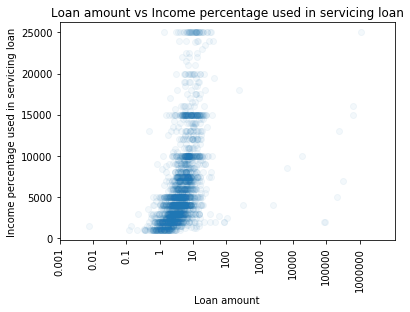

In [44]:
completed_chargedoff_samp = completed_chargedoff.sample(n=2000, replace = False)

plt.scatter(data=completed_chargedoff_samp, y="loan_original_amount", x="income_percentage_used_on_loan", alpha=0.05)
plt.xscale("log")
plt.xticks(ticks,labels,rotation=90)
plt.xlabel("Loan amount")
plt.ylabel("Income percentage used in servicing loan")
plt.title("Loan amount vs Income percentage used in servicing loan");

Little to no correlation exists between income percentage used in servicing loan and loan amount up to about 10000. The range of percentage used in servicing loans stayed relatively the same with increase in loan amount above 10000.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One of the major findings is that increasing loan terms negatively correlates with loan completion. Also, completed loans had a lower median percentage of income used in servicing loans compared to charged off loans. I also observed that the lowest value for charged off loan was 10 times higer than that of completed loans. Loan original amount did not seem to correlate with the loan status. Higher borrower annual percentage rate were associated negatively with loan status while higher prosper score were associated positively with loan status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was a strong positive correlation between the loan original amount and the monthly loan payment. Suprisingly, there was little to no correlation between the monthly loan payment and the stated monthly income of the borrower. Also there was an initial positive correlation between loan amount and the income percentage used in servicing loans. Loan amount also positively correlates with loan term.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### What does the relationship between between loan status, term monthly loan payment and loan original amount look like?

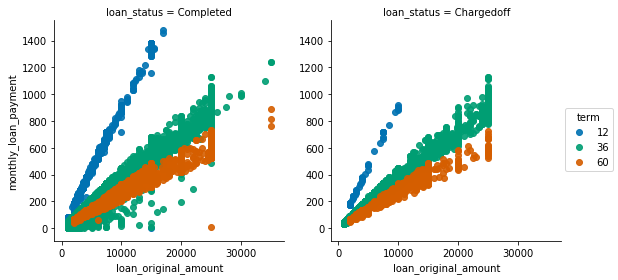

In [37]:
g=sb.FacetGrid(data=completed_chargedoff, hue="term", size=4, palette="colorblind", col="loan_status")
g.map(plt.scatter, "loan_original_amount", "monthly_loan_payment", alpha=0.9)
g.add_legend();

In our bivariate eploration, we had seen a very strong positive correlation between monthly loan payment and loan origianal amount. In this chart where we include term, we can see that the slope is steeper as the loan term shortens indicating that for the same loan amount collected, a higher monthly loan is payed with shorter term. There is no obvious difference in the slopes for the different loan statuses. Also, people that had their loans chargedoff eventually were not given loans greater than 12,000 for 12 months term loans and greater than about 25,000 for longer term loans. The reason for this is unknown.

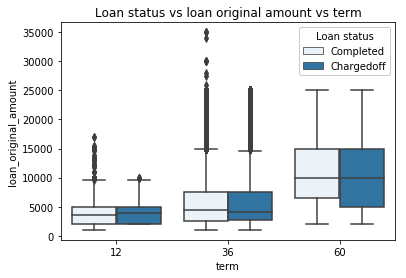

In [50]:
ax = sb.boxplot(data=completed_chargedoff, x="term",y="loan_original_amount", hue="loan_status", color=color)
ax.legend(loc = 1, framealpha=1, title="Loan status")
plt.title("Loan status vs loan original amount vs term");

I decided to use a boxplot which is better at summarizing to explore a possible relationship between the loan status, loan original amount and the term. This shows clearly that the relationship between the loan original payment and term are the same regardless of the loan status. 

### What is the relationship between Loan_status vs Borrower_apr vs Prosper_score?

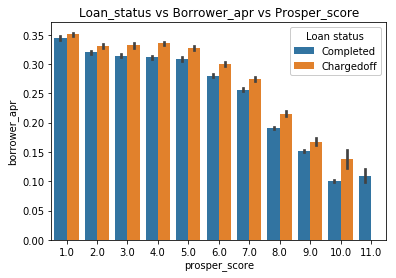

In [45]:

ax = sb.barplot(data=completed_chargedoff, x="prosper_score", y="borrower_apr", hue="loan_status", dodge=0.3)
ax.legend(loc = 1, framealpha=1, title="Loan status")
plt.title("Loan_status vs Borrower_apr vs Prosper_score");

For each prosper score, the average borrow_apr is higher in charged off loans than completed loans. Overall, the average borrow_apr falls as prosper score increases regardless of loan status.

### Relationship between loan status vs stated monthly income vs monthlyloan payment

In [47]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0,completed_chargedoff.monthly_loan_payment.max()+50,50)
    bins_y = np.arange(0,completed_chargedoff.stated_monthly_income.max()+2000,2000)
       
    plt.hist2d(x, y, bins = [bins_x, bins_y],cmap = palette, cmin = 0.5)
   

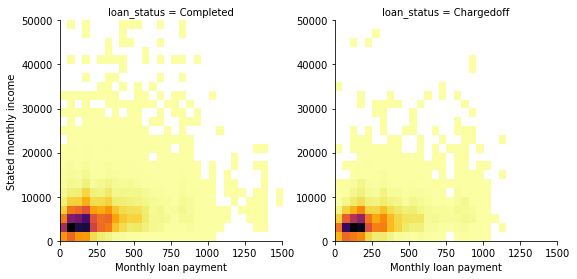

In [49]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = completed_chargedoff, col = "loan_status", size = 4)
g.map(hist2dgrid, 'monthly_loan_payment', 'stated_monthly_income', color = 'inferno_r')
g.set_xlabels('Monthly loan payment')
g.set_ylabels('Stated monthly income');

No correlation is observed

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The correlation between the loan original amount and the monthly loan payment is higher with a decrease in loan term While the correlation is quite the same regardless of loan_status. 
Prosper score and borrower_apr showed a good relationship with whether a loan will be completed or not.


### Were there any interesting or surprising interactions between features?

> There were not very many correlations between the variables explored which was a bit suprising. 

## Conclusions
> Loans with shorter term are more likely to be completed. Higher median Income percentage used in servicing loans is associated with charged off loans. No correlation between the loan original amount and whether the loan will be completed or charged off. However loan amount per term was smaller in chargedoff loans in comparison to completed loans.  
A higher Borrower_apr is associated with loan charge off while a higher prosper score is associated with loan completion.